# Preprocessing data

In [157]:
import pandas as pd
import numpy as np

In [158]:
df = pd.read_csv('data.csv')

In [159]:
df.head(15)

,Unnamed: 0,Link,Price,Bedrooms,Bathrooms,Parking,Size,Measure,Location,Type
0,0,/property-apartment-nsw-sydney-144148388,"$1,100,000",1.0,1.0,1.0,49,m²,Sydney,Apartment
1,1,/property-apartment-nsw-sydney-145512124,"$1,985,000",2.0,2.0,2.0,NaN,NaN,Sydney,Apartment
2,2,/property-apartment-nsw-sydney-145635704,"Price Guide $1,380,000",2.0,2.0,2.0,103,m²,Sydney,Apartment
3,3,/property-apartment-nsw-haymarket-145510544,Price Guide: 1.85M,2.0,2.0,2.0,101,m²,Sydney,Apartment
4,4,/property-apartment-nsw-haymarket-143546108,Price Guide 1.75M,2.0,2.0,2.0,NaN,NaN,Sydney,Apartment
5,5,/property-apartment-nsw-haymarket-145631780,"$800,000",1.0,1.0,NaN,NaN,NaN,Sydney,Apartment
6,6,/property-apartment-nsw-sydney-145504464,"Price Guide $2,100,000",2.0,2.0,2.0,NaN,NaN,Sydney,Apartment
7,7,/property-apartment-nsw-sydney-145383528,"$1,850,000 - $1,950,000",1.0,1.0,NaN,61,m²,Sydney,Apartment
8,8,/property-apartment-nsw-sydney-145503020,"$600,000 To $660,000",1.0,1.0,NaN,NaN,NaN,Sydney,Apartment
9,9,/property-apartment-nsw-sydney-145028688,"Auction Guide $5,500,000",3.0,3.0,3.0,149,m²,Sydney,Apartment


In [160]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Link', axis=1, inplace=True)

In [161]:
# Delete useless characters
df.loc[:, 'Price'] = df['Price'].str.replace('[a-zA-Z]', '', regex=True)
df.loc[:, 'Price'] = df['Price'].str.replace('$', '')
df.loc[:, 'Price'] = df['Price'].str.replace('-', '')
df.loc[:, 'Price'] = df['Price'].str.replace('+', '')
df.loc[:, 'Price'] = df['Price'].str.replace(',', '')
df.loc[:, 'Price'] = df['Price'].str.replace('|', '')

In [162]:
def replace_with_mean(value):
    numbers = value.split()
    length = len(numbers)
    if length == 1:
        try:
            return int(numbers[0])
        except ValueError:
            return np.nan
    if length > 2:
        return np.nan
    elif length == 2:
        try:
            mean = (int(numbers[0]) + int(numbers[1])) / 2
            return int(mean)
        except ValueError:
            return np.nan
    return np.nan

In [163]:
# Replace price on properties
print(f'Total number of rows: {len(df)}')

df = df[df['Price'].notna()]
df['Price'] = df['Price'].astype('string')
df['Price'] = df['Price'].apply(replace_with_mean)
df = df[df['Price'].notna()]

print(f'Total number of rows: {len(df)}')

Total number of rows: 6344
Total number of rows: 5641


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 6343
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      5641 non-null   float64
 1   Bedrooms   4756 non-null   float64
 2   Bathrooms  4835 non-null   float64
 3   Parking    4333 non-null   float64
 4   Size       3806 non-null   object 
 5   Measure    3806 non-null   object 
 6   Location   5641 non-null   object 
 7   Type       5641 non-null   object 
dtypes: float64(4), object(4)
memory usage: 396.6+ KB


In [165]:
# Delete nan rows
print(f'Total number of rows: {len(df)}')

df.loc[:, 'Size'] = df['Size'].str.replace(',', '')
df = df[df['Size'].notna()]

df['Parking'] = df['Parking'].fillna(0)
df['Bedrooms'] = df['Bedrooms'].fillna(0)
df['Bathrooms'] = df['Bathrooms'].fillna(0)

print(f'Total number of rows: {len(df)}')

Total number of rows: 5641
Total number of rows: 3806


In [166]:
def convert_to_m(row):
    if row['Measure'] == 'ha':
        return float(row['Size']) * 10000
    else:
        return float(row['Size'])

In [167]:
# Convert ha to meters
df['Size'] = df.apply(convert_to_m, axis=1)

df.drop('Measure', axis=1, inplace=True)

In [168]:
# No nan values and every column with correct variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3806 entries, 0 to 6343
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3806 non-null   float64
 1   Bedrooms   3806 non-null   float64
 2   Bathrooms  3806 non-null   float64
 3   Parking    3806 non-null   float64
 4   Size       3806 non-null   float64
 5   Location   3806 non-null   object 
 6   Type       3806 non-null   object 
dtypes: float64(5), object(2)
memory usage: 237.9+ KB


In [169]:
df.head()

,Price,Bedrooms,Bathrooms,Parking,Size,Location,Type
0,1100000.0,1.0,1.0,1.0,49.0,Sydney,Apartment
2,1380000.0,2.0,2.0,2.0,103.0,Sydney,Apartment
7,1900000.0,1.0,1.0,0.0,61.0,Sydney,Apartment
9,5500000.0,3.0,3.0,3.0,149.0,Sydney,Apartment
13,695.0,1.0,1.0,0.0,62.0,Sydney,Apartment


In [170]:
df['Type'].value_counts()

Type
House                   2306
Residential Land         764
Apartment                414
Unit                     107
Acreage                   60
Townhouse                 46
Duplex/Semi-detached      23
Retirement Living         21
Terrace                   17
Studio                    15
Villa                     15
Other                      9
Block Of Units             6
Lifestyle                  2
Serviced Apartment         1
Name: count, dtype: int64

In [171]:
df.describe()

,Price,Bedrooms,Bathrooms,Parking,Size
count,3.806000e+03,3806.000000,3806.000000,3806.000000,3.806000e+03
mean,1.720743e+11,2.841040,2.858119,2.719916,2.958180e+03
std,1.886002e+12,1.858519,1.845646,1.924558,2.791911e+04
min,3.000000e+00,0.000000,0.000000,0.000000,9.290000e+00
25%,7.900000e+05,1.000000,1.000000,0.000000,2.605500e+02
50%,1.013350e+06,3.000000,3.000000,3.000000,3.263500e+02
75%,1.324650e+06,4.000000,4.000000,4.000000,5.120000e+02
max,4.750001e+13,15.000000,15.000000,15.000000,1.055000e+06


# Plotting and Transform Data

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [173]:
# Log transformation
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Check for zero or negative values and apply the log transformation
for col in numerical_columns:
    if (df[col] <= 0).any():
        # Adjust the values to avoid log(0) or log(negative)
        # You can add a small constant (e.g., 1) or use another method based on your data
        df[col] = df[col] + 1
    
    # Apply the log transformation
    df[col] = np.log(df[col])

In [174]:
# Deleting outliers
threshold = 2

# Function to calculate Z-score and remove outliers
def remove_outliers_z_score(df, threshold=2):
    df_clean = df.copy()
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        df_clean[column + '_z_score'] = (df[column] - mean) / std
        df_clean = df_clean[df_clean[column + '_z_score'].abs() <= threshold]
        df_clean = df_clean.drop(columns=[column + '_z_score'])
    return df_clean

# Apply the function
print(f'Length before delete outliers {len(df)}')
df = remove_outliers_z_score(df, threshold)
print(f'Length after delete outliers {len(df)}')

Length before delete outliers 3806
Length after delete outliers 3505


<Axes: xlabel='Price', ylabel='Count'>

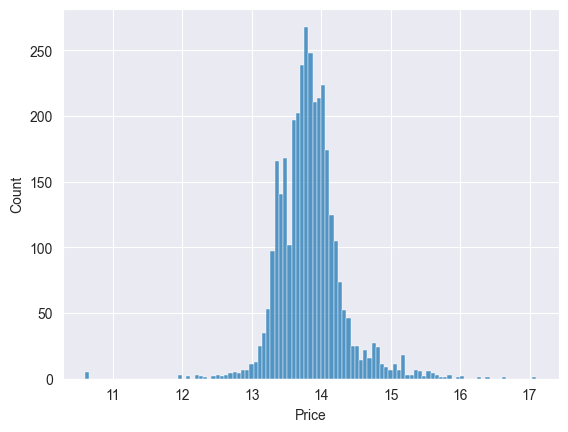

In [175]:
sns.histplot(data=df, x="Price")

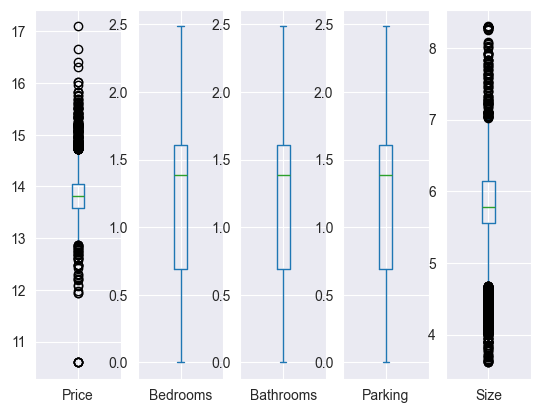

In [176]:
df.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

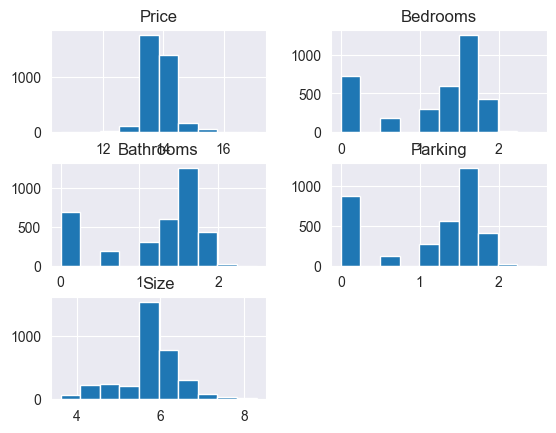

In [177]:
df.hist()
plt.show()

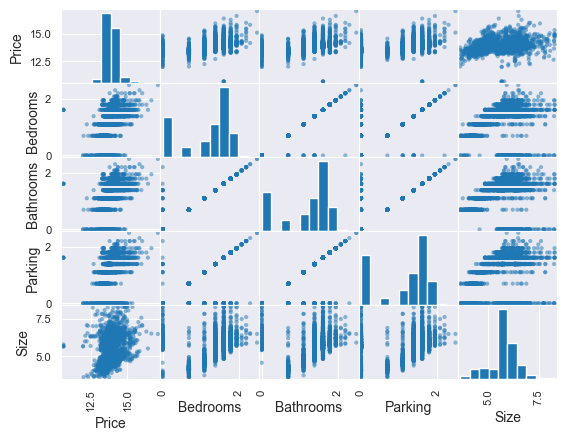

In [178]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

In [179]:
# import required data transformation and set up column transformer object
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [180]:
# Separate dependent and independent variables
x = df.iloc[:,1:]
print(x.shape)
y = df.iloc[:,[0]]
print(y.shape)

(3505, 6)
(3505, 1)


In [181]:
# Create a list of numeric attributes
num_attribs = list(x.select_dtypes(include=np.number).columns)

In [182]:
print(num_attribs)

['Bedrooms', 'Bathrooms', 'Parking', 'Size']


In [183]:
# create a list of categorical attributes
cat_attribs = list(x.select_dtypes(exclude=np.number).columns)

In [184]:
print(cat_attribs)

['Location', 'Type']


In [185]:
col_transformer = ColumnTransformer([('num',MinMaxScaler(),num_attribs),('cat',OneHotEncoder(sparse_output=False),cat_attribs)])

In [186]:
# Data separated
x = col_transformer.fit_transform(x)
target_scaler = MinMaxScaler()
y = target_scaler.fit_transform(y.reset_index().drop('index', axis=1))

In [187]:
len(list(df['Location'].unique()))

158

In [188]:
df.head()

,Price,Bedrooms,Bathrooms,Parking,Size,Location,Type
0,13.910821,0.693147,0.693147,0.693147,3.891820,Sydney,Apartment
2,14.137594,1.098612,1.098612,1.098612,4.634729,Sydney,Apartment
7,14.457364,0.693147,0.693147,0.000000,4.110874,Sydney,Apartment
9,15.520259,1.386294,1.386294,1.386294,5.003946,Sydney,Apartment
16,13.910821,1.098612,1.098612,0.000000,4.442651,Sydney,Unit


In [189]:
len(list(df['Type'].unique()))

13

In [190]:
x.shape

(3505, 175)

In [191]:
y.shape
# It has more columns by the one hot encoder

(3505, 1)

In [192]:
print(x.shape)

(3505, 175)


In [196]:
# Getting the column names from the OneHotEncoder
onehotencoder = col_transformer.named_transformers_['cat']
encoded_cat_columns = onehotencoder.get_feature_names_out(cat_attribs)

# Combine the numerical and encoded categorical column names
transformed_columns = num_attribs + list(encoded_cat_columns)

# Creating a new DataFrame with the transformed data
df_transformed = pd.DataFrame(x, columns=transformed_columns)

In [193]:
print(len(transformed_columns))

175


In [197]:
df_transformed.head()

,Bedrooms,Bathrooms,Parking,Size,Location_111 Cassuade Ave Avenue,Location_12 Alan Street,Location_20 Ridge Square,Location_25-52 Park Road,Location_33 Park Road,Location_50-56 Thirteenth Avenue,...,Type_House,Type_Other,Type_Residential Land,Type_Retirement Living,Type_Serviced Apartment,Type_Studio,Type_Terrace,Type_Townhouse,Type_Unit,Type_Villa
0,0.278943,0.278943,0.278943,0.059902,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.442114,0.442114,0.442114,0.218326,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.278943,0.278943,0.000000,0.106615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.557886,0.557886,0.557886,0.297061,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.442114,0.442114,0.000000,0.177366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [198]:
# Create interaction columns in a separate DataFrame
interaction_columns = {
    col + '_size_interaction': df_transformed[col] * df_transformed['Size']
    for col in encoded_cat_columns
}

# Convert the dictionary of interaction columns into a DataFrame
interaction_df = pd.DataFrame(interaction_columns)

# Concatenate the interaction columns with the original DataFrame
df_final = pd.concat([df_transformed, interaction_df], axis=1)

In [199]:
x = df_final.to_numpy()

In [200]:
x.shape

(3505, 346)

# Fit Models

In [201]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [202]:
validation_size = 0.25
seed = 7
#x = x.toarray()
#y = y.toarray()
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [203]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(2628, 346)
(877, 346)
(2628, 1)
(877, 1)


In [204]:
# Test options and evaluation metric
seed = 6
scoring = 'accuracy'

In [205]:
# Spot Check Algorithms
models = [('LR', LinearRegression()), 
          ('Ridge', Ridge()),
          ('CART', DecisionTreeRegressor()), 
          ('RF', RandomForestRegressor()), 
          ('KNN', KNeighborsRegressor()),
          ('BayesianRidge', BayesianRidge())]
# evaluate each model in turn
results = []
names = []

for name, model in models:  
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(estimator=model, X=X_train, y=Y_train.ravel(), cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -233847625424428924928.000000 (356219142667228807168.000000)
Ridge: 0.597597 (0.061609)
CART: 0.188669 (0.122214)
RF: 0.437453 (0.084797)
KNN: 0.436132 (0.079292)
BayesianRidge: 0.600065 (0.063893)


# The best models is the Ridge

In [206]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [207]:
# Make predictions on validation dataset
bayesianRidge = BayesianRidge()
bayesianRidge.fit(X_train, Y_train.ravel())
predictions = bayesianRidge.predict(X_validation)

# Calculate and print evaluation metrics
mae = mean_absolute_error(Y_validation, predictions)
mse = mean_squared_error(Y_validation, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_validation, predictions)

n = len(Y_validation)
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error (MAE): 0.028009771705667142
Mean Squared Error (MSE): 0.002396690684499158
Root Mean Squared Error (RMSE): 0.04895600764461046
R-squared (R2): 0.5388287174642166
Adjusted R-squared: 0.23776218207293154


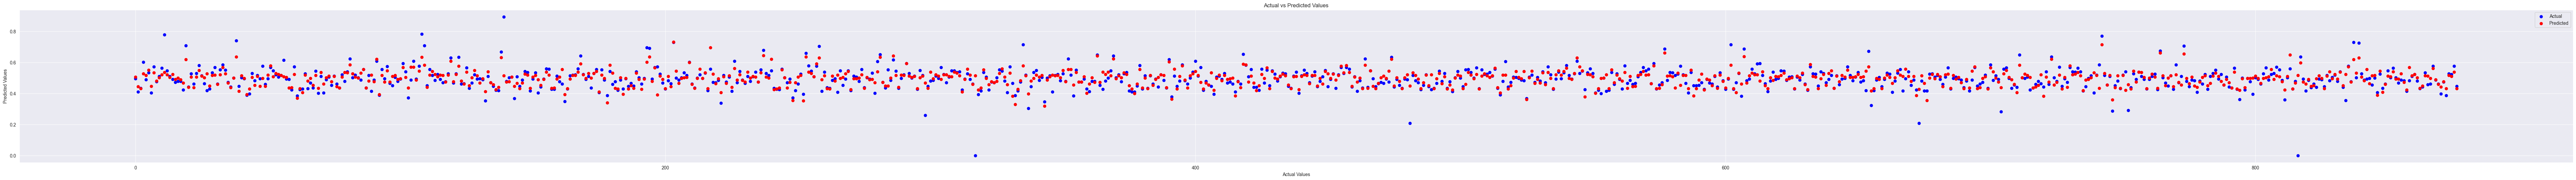

In [208]:
# Plot actual vs predicted values
plt.figure(figsize=(100, 6))
plt.scatter(y=Y_validation,x= np.arange(0, Y_validation.shape[0], 1), color='blue', label='Actual')
plt.scatter(y=predictions, x=np.arange(0, Y_validation.shape[0], 1), color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

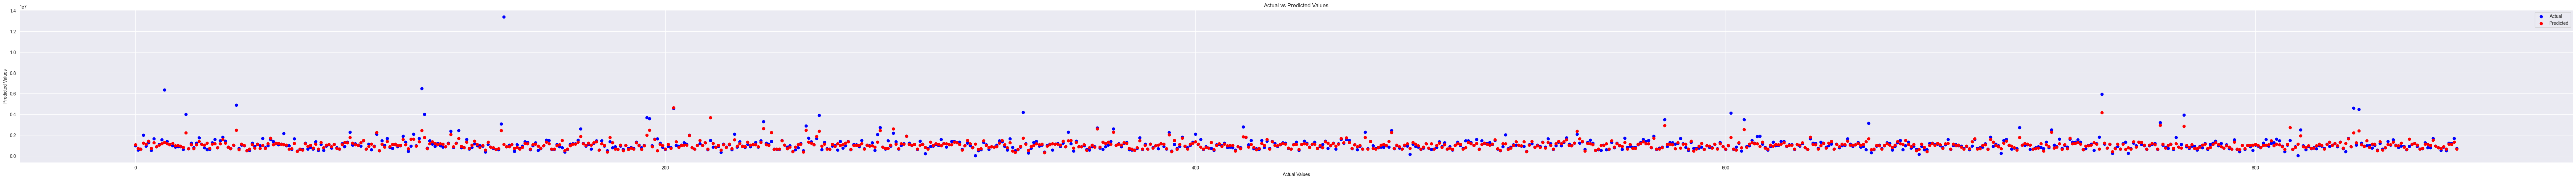

In [209]:
# Plot actual vs predicted values
plt.figure(figsize=(100, 6))
plt.scatter(y=np.exp(target_scaler.inverse_transform(Y_validation.reshape(-1, 1))),x= np.arange(0, Y_validation.shape[0], 1), color='blue', label='Actual')
plt.scatter(y=np.exp(target_scaler.inverse_transform(predictions.reshape(-1, 1))), x=np.arange(0, Y_validation.shape[0], 1), color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

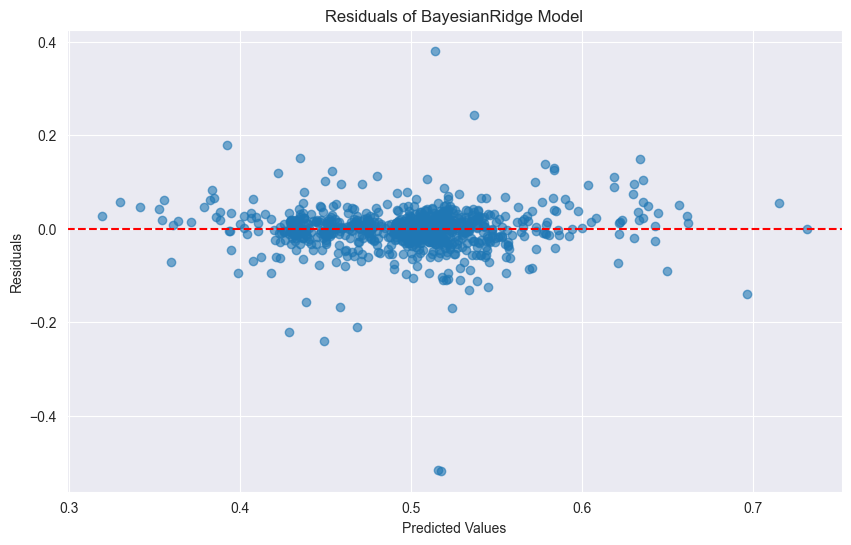

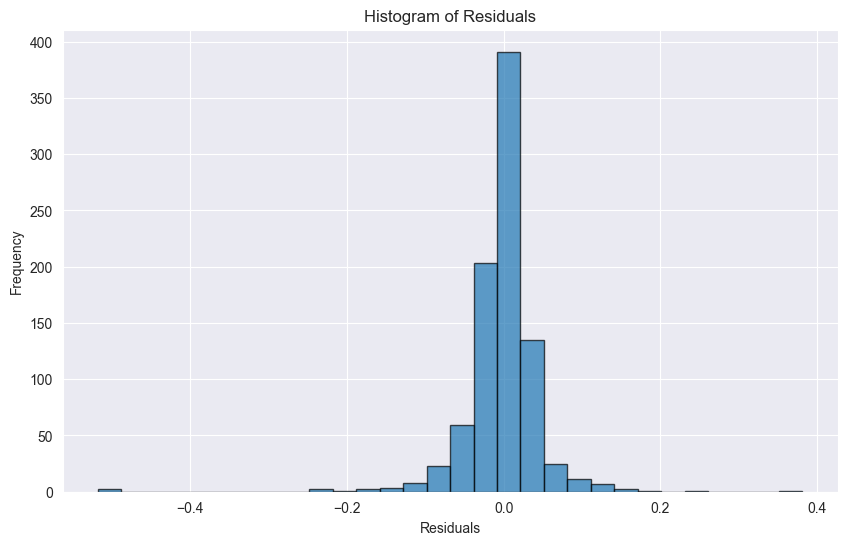

In [210]:
# Calculate the residuals
residuals = Y_validation.ravel() - predictions

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of BayesianRidge Model')
plt.show()


# Optionally, plot a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Easy Predict

In [215]:
print(f'Available suburbs: {df['Location'].unique()} \n')
print(f'Available property types {df["Type"].unique()}')

Available suburbs: ['Sydney' 'Barangaroo' 'Haymarket' 'North Sydney' 'Sydney Olympic Park'
 'Concord West' 'Homebush West' 'Rhodes' 'Mosman' 'Pyrmont'
 'Wentworth Point' 'Lidcombe' 'Woolloomooloo' 'St Leonards' 'Chippendale'
 'Neutral Bay' 'Surry Hills' 'Potts Point' 'Darlinghurst' 'Homebush'
 'Auburn' 'Ultimo' 'Oran Park' 'Leppington' 'Macquarie Fields' 'Camden'
 'Gledswood Hills' 'Austral' 'Harrington Park' 'Bradbury' 'Spring Farm'
 'Leumeah' 'St Andrews' 'Ingleburn' 'Gregory Hills' 'Ambarvale'
 'Glenfield' 'Eschol Park' 'Rosemeadow' 'Airds' 'Catherine Field'
 'Middleton Grange' 'Figtree Hill' 'Claymore' '111 Cassuade Ave Avenue'
 'Wedderburn' 'Gilead' 'Webber CCT' '25-52 Park Road'
 '50-56 Thirteenth Avenue' '20 Ridge Square' '33  Park Road'
 '9 Kelly Street' 'lot Jonica Road' 'Penrith' 'Kurrajong Hills'
 'Glenmore Park' 'Lawson' 'Seven Hills' 'Oakville' 'Hobartville'
 'North Richmond' 'Kingswood' 'Kurrajong Heights' 'Londonderry'
 'Riverstone' 'Schofields' 'Blaxland' 'Emu Plains' '

In [226]:
bedrooms = 1
bathrooms = 1
parking = 0
Size = 50
Location = 'Sydney Olympic Park'
Type = 'Apartment'

x_easy = {'Bedrooms': [bedrooms], 'Bathrooms':[bathrooms], 'Parking':[parking], 'Size':[Size], 'Location':[Location], 'Type':[Type]}

x_easy = pd.DataFrame.from_dict(x_easy)

In [227]:
# Check for zero or negative values and apply the log transformation
for col in num_attribs:
    if (x_easy[col] <= 0).any():
        # Adjust the values to avoid log(0) or log(negative)
        # You can add a small constant (e.g., 1) or use another method based on your data
        x_easy[col] = x_easy[col] + 1
    
    # Apply the log transformation
    x_easy[col] = np.log(x_easy[col])
    
x_easy = col_transformer.transform(x_easy)

In [228]:
# Creating a new DataFrame with the transformed data
df_transformed = pd.DataFrame(x_easy, columns=transformed_columns)

In [231]:
# Create interaction columns in a separate DataFrame
interaction_columns = {
    col + '_size_interaction': df_transformed[col] * df_transformed['Size']
    for col in encoded_cat_columns
}

# Convert the dictionary of interaction columns into a DataFrame
interaction_df = pd.DataFrame(interaction_columns)

# Concatenate the interaction columns with the original DataFrame
df_final = pd.concat([df_transformed, interaction_df], axis=1)
x_easy = df_final.to_numpy()

In [232]:
y_easy = bayesianRidge.predict(x_easy)

In [233]:
y_easy = np.exp(target_scaler.inverse_transform(y_easy.reshape(-1, 1)))
print(y_easy)

[[456027.48915068]]
